多输入通道单输出通道（基础）

In [1]:
import torch
from d2l import torch as d2l

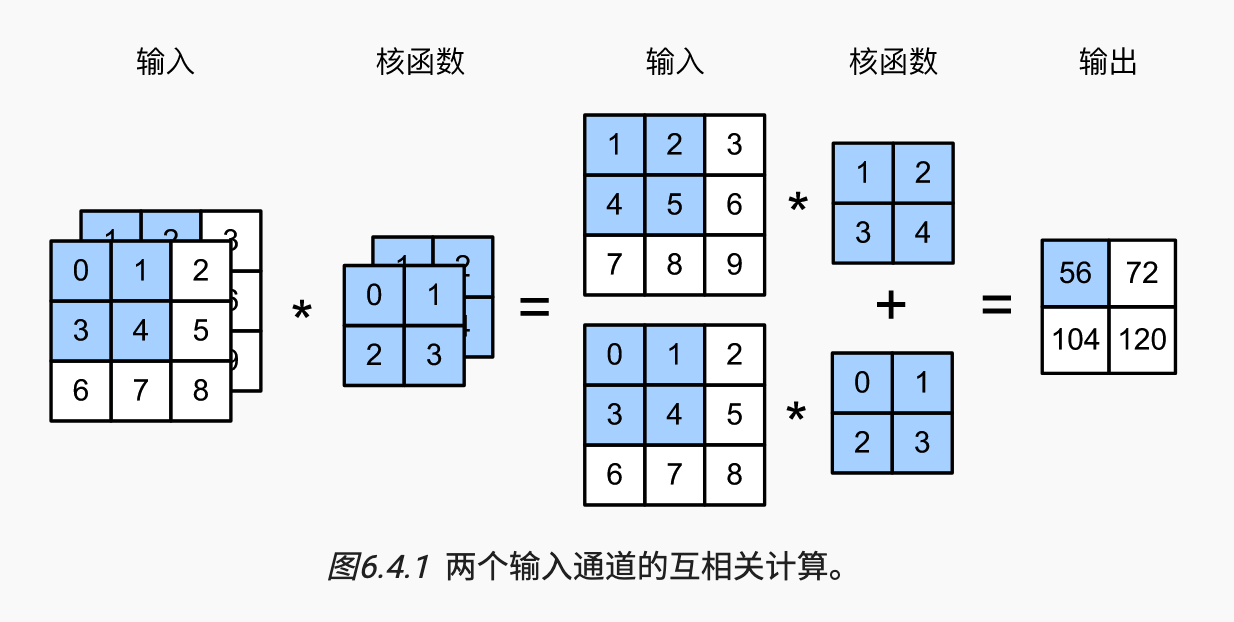

In [2]:
def corr2d_multi_in(X, K):
    # 先遍历X和K的第0个维度，也就是通道维度，再把它们加在一起；
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))
    # d2l.corr2d x：3*3，k 2*2 这俩进行卷积；

In [3]:
import numpy as np
X = np.array([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = np.array([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

X.shape, X, K.shape, K

((2, 3, 3),
 array([[[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]],
 
        [[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]]),
 (2, 2, 2),
 array([[[0., 1.],
         [2., 3.]],
 
        [[1., 2.],
         [3., 4.]]]))

In [4]:
corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

多输入通道多输出通道

In [5]:
def corr2d_multi_in_out(X, K):
    # 迭代“K”的第0个维度，每次都对输入“X”执行互相关运算。 每遍历一个都是一次多输入单输出的，stack堆起来就是多输入多输出的；
    # 最后将所有结果都叠加在一起
    return torch.stack([torch.Tensor(corr2d_multi_in(X, k)) for k in K], 0)

In [6]:
K = torch.Tensor(K)

In [7]:
K = torch.stack((K, K + 1, K + 2), 0) # 输出通道数为三，所以K应该 3*2*2*2
K.shape

torch.Size([3, 2, 2, 2])

In [8]:
K

tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]],


        [[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]])

In [9]:
corr2d_multi_in_out(X, K)

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'